In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
rc('text', usetex=True)

def read_num(f):
    num = []
    with open(f, 'r') as t:
        lines = t.readlines()
    for line in lines:
        num.append(int(line.split('sta: ')[-1]))
    return num

results = {}
for root, dirs, files in os.walk(".", topdown=False):
    for name in files:
        if 'txt' in name:
            results[name] = read_num(name)

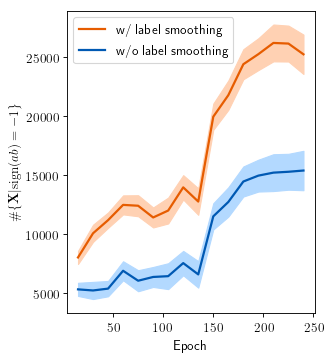

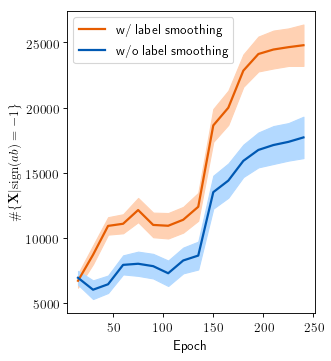

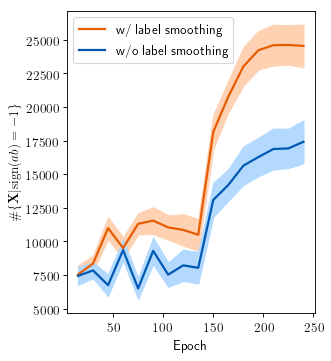

In [24]:
# t = 5
for t in [2,4,5]:
    names = [f'kd_sta_with_labelsmooth_T{t}.txt', f'kd_sta_wo_labelsmooth_T{t}.txt']
    v = [results[i] for i in names]
    x = list(range(15, 241, 15))
    df_se = np.linspace(500,1500, 16) + np.random.rand(16)*200

    fig, ax = plt.subplots(1, 1, figsize=(4,5), dpi=80)
    ax.set_ylabel("$\#\{\mathbf{X}|\mathrm{sign}(ab)=-1\}$", fontsize=12)
    ax.set_xlabel("Epoch", fontsize=12)
    ax.plot(x, v[0], color="#e65c00", lw=2)
    ax.fill_between(x, v[0]-df_se, v[0]+df_se, color="#ffd1b3")
    ax.plot(x, v[1], color="#0059b3", lw=2)
    ax.fill_between(x, v[1]-df_se, v[1]+df_se, color="#b3d9ff")
    ax.legend(['w/ label smoothing', 'w/o label smoothing'], fontsize=12)
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    fig.savefig(f'num{t}.pdf')